In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the actual filename if you uploaded it.
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
# Count the number of empty values (NaN or null) in each column
empty_count = df.isna().sum()

# Print the result
print(empty_count)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
# Define a function to extract the company name and correct spelling
def extract_company_name(car_name):
    # Create a dictionary to map incorrect spellings to correct ones
    spelling_correction = {
        'maxda': 'mazda',
        'porcshce': 'porsche',
        'toyouta': 'toyota',
        'vokswagen': 'volkswagen',
        'vw': 'volkswagen'
    }

    # Iterate through the dictionary and apply corrections
    for incorrect, correct in spelling_correction.items():
        car_name = car_name.replace(incorrect, correct)

    # Split the car name by space and return the first part as the company name
    return car_name.split(' ')[0]

# Apply the extract_company_name function to create the 'CompanyName' column
df['CompanyName'] = df['CarName'].apply(extract_company_name)

# Display the DataFrame with the new 'CompanyName' column
print(df)


In [8]:
# Delete the 'car_ID' and 'CarName' columns
columns_to_delete = ['car_ID', 'CarName' , "symboling"]
df = df.drop(columns=columns_to_delete)

In [23]:
# Use pandas' get_dummies function for one-hot encoding
df_encoded = pd.get_dummies(df, columns=[ 'CompanyName','doornumber','fueltype','fuelsystem','cylindernumber','enginetype','enginelocation','drivewheel','aspiration','carbody'])

# Display the DataFrame with one-hot encoded columns
print(df_encoded)

     wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0         88.6      168.8      64.1       48.8        2548         130   
1         88.6      168.8      64.1       48.8        2548         130   
2         94.5      171.2      65.5       52.4        2823         152   
3         99.8      176.6      66.2       54.3        2337         109   
4         99.4      176.6      66.4       54.3        2824         136   
..         ...        ...       ...        ...         ...         ...   
200      109.1      188.8      68.9       55.5        2952         141   
201      109.1      188.8      68.8       55.5        3049         141   
202      109.1      188.8      68.9       55.5        3012         173   
203      109.1      188.8      68.9       55.5        3217         145   
204      109.1      188.8      68.9       55.5        3062         141   

     boreratio  stroke  compressionratio  horsepower  ...  drivewheel_4wd  \
0         3.47    2.68            

In [22]:
# Specify the file path where you want to save the CSV file
file_path = 'carprice_new.csv'

# Save the DataFrame to a CSV file
df_encoded.to_csv(file_path, index=False)  # Set index=False to exclude row numbers

# Check if the file has been saved successfully
print(f'DataFrame saved to {file_path}')

DataFrame saved to carprice_new.csv


<ipython-input-12-4379fc57ce96>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


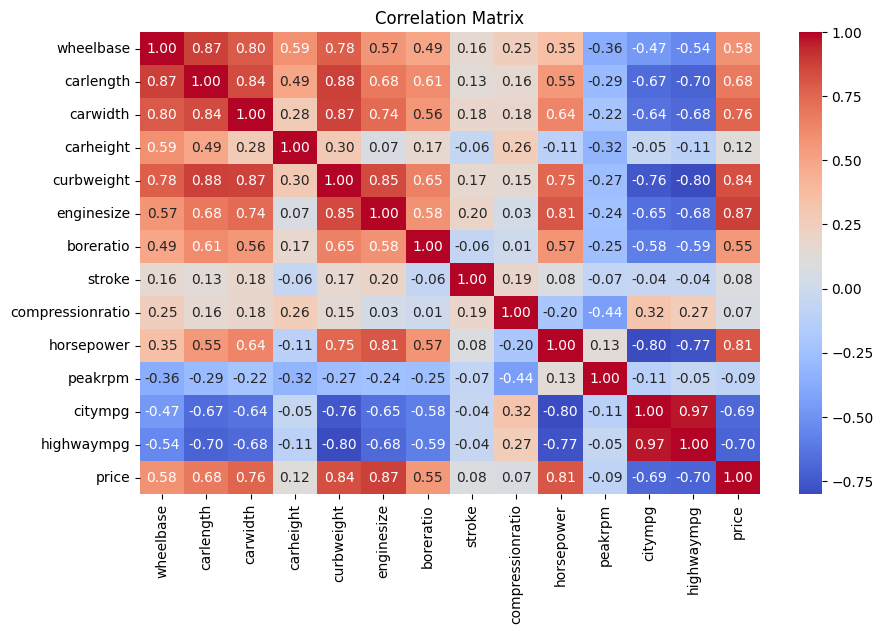

Features with the highest correlation to 'Price':
price         1.000000
enginesize    0.874145
Name: price, dtype: float64


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Find the feature(s) with the highest correlation to 'Price'
highest_correlation = correlation_matrix['price'].nlargest(2)  # The largest value is 1 (correlation with itself)
print("Features with the highest correlation to 'Price':")
print(highest_correlation)

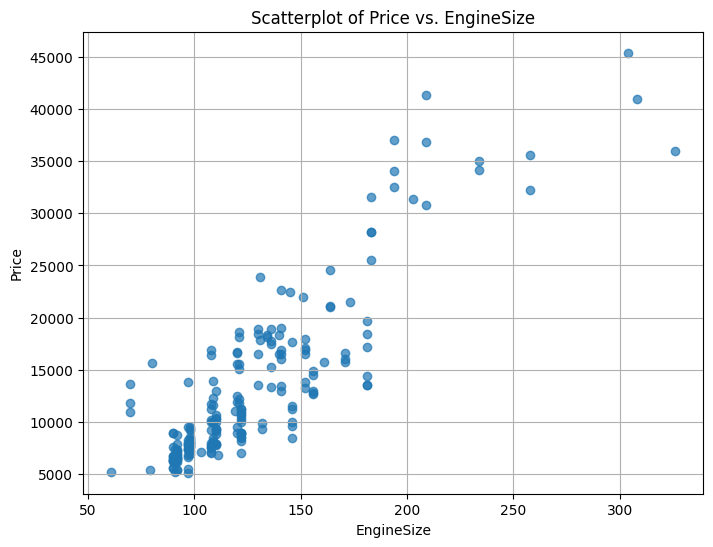

In [16]:
# Extract the 'Price' and 'EngineSize' columns
price = df['price']
engine_size = df['enginesize']

# Create a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(engine_size, price, alpha=0.7)
plt.title('Scatterplot of Price vs. EngineSize')
plt.xlabel('EngineSize')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Separate features (X) and target (y)
X = df_encoded.drop(columns=['price'])  # Replace 'price' with your target column
y = df_encoded['price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

import torch
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  # Reshape to (batch_size, 1)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)


## with MSELoss and Adam

Epoch [1000/100000], Training Loss: 3581302.5000, Validation Loss: 13917679.0000
Epoch [2000/100000], Training Loss: 2070789.1250, Validation Loss: 10896625.0000
Epoch [3000/100000], Training Loss: 1668509.3750, Validation Loss: 9782485.0000
Epoch [4000/100000], Training Loss: 1245707.1250, Validation Loss: 8364063.5000
Epoch [5000/100000], Training Loss: 892728.2500, Validation Loss: 7059702.5000
Epoch [6000/100000], Training Loss: 676045.7500, Validation Loss: 6627600.5000
Epoch [7000/100000], Training Loss: 487186.5312, Validation Loss: 6663324.0000
Epoch [8000/100000], Training Loss: 373955.0312, Validation Loss: 6396115.0000
Epoch [9000/100000], Training Loss: 296353.7500, Validation Loss: 6439194.0000
Epoch [10000/100000], Training Loss: 244722.0625, Validation Loss: 6741367.5000
Epoch [11000/100000], Training Loss: 199500.3438, Validation Loss: 6671683.5000
Epoch [12000/100000], Training Loss: 157552.1094, Validation Loss: 6917957.0000
Epoch [13000/100000], Training Loss: 135653

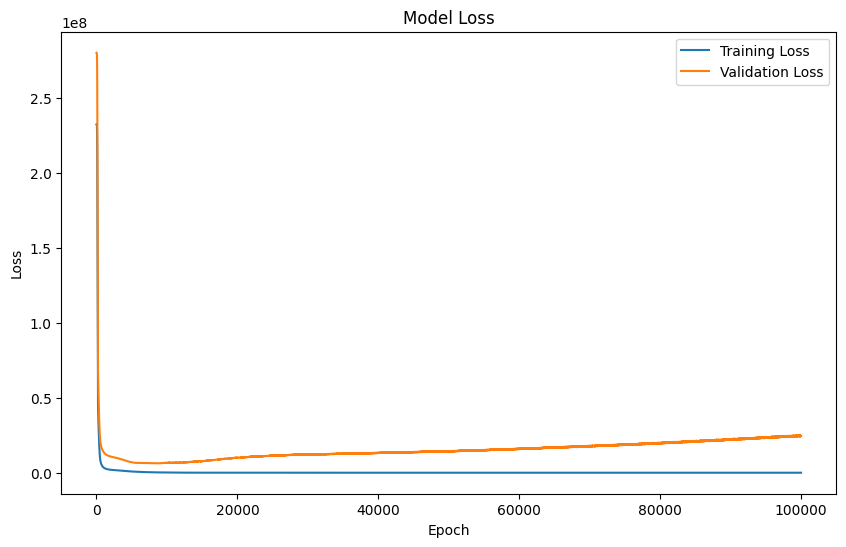

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim


# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, 1)  # Output layer for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Initialize the model and optimizer
model = MLP(X_train.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()  # Mean Squared Error loss for regression

# Training loop
num_epochs = 100000
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation loss
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch [1000/100000], Training Loss: 22426104.0000, Validation Loss: 40573600.0000
Epoch [2000/100000], Training Loss: 6018446.5000, Validation Loss: 17727412.0000
Epoch [3000/100000], Training Loss: 3488975.7500, Validation Loss: 13902348.0000
Epoch [4000/100000], Training Loss: 2563014.0000, Validation Loss: 12215299.0000
Epoch [5000/100000], Training Loss: 2174652.5000, Validation Loss: 11457699.0000
Epoch [6000/100000], Training Loss: 1997000.2500, Validation Loss: 11015958.0000
Epoch [7000/100000], Training Loss: 1883078.3750, Validation Loss: 10523243.0000
Epoch [8000/100000], Training Loss: 1787780.0000, Validation Loss: 9897762.0000
Epoch [9000/100000], Training Loss: 1701249.5000, Validation Loss: 9267476.0000
Epoch [10000/100000], Training Loss: 1625671.0000, Validation Loss: 8754413.0000
Epoch [11000/100000], Training Loss: 1565465.6250, Validation Loss: 8448875.0000
Epoch [12000/100000], Training Loss: 1415841.0000, Validation Loss: 8000629.0000
Epoch [13000/100000], Trainin

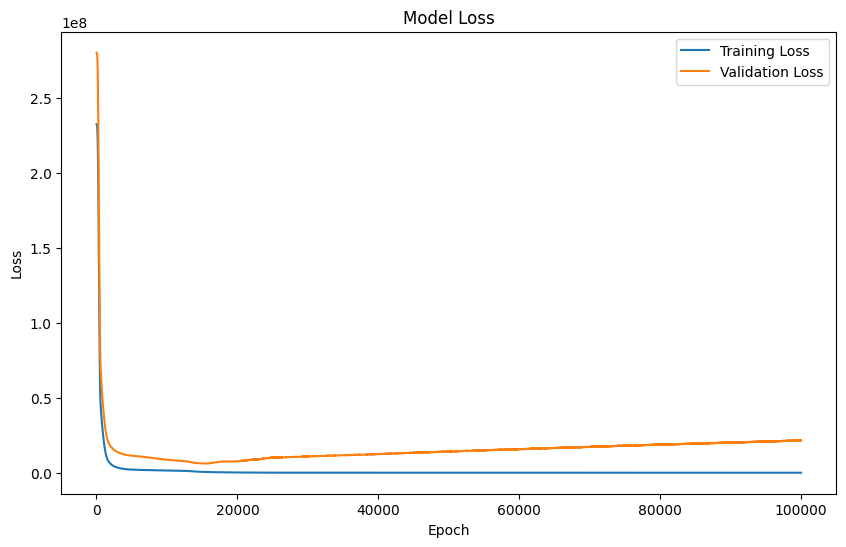

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim


# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, 1)  # Output layer for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Initialize the model and optimizer
model = MLP(X_train.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()  # Mean Squared Error loss for regression

# Training loop
num_epochs = 100000
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation loss
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch [1000/100000], Training Loss: 25445120.0000, Validation Loss: 44507068.0000
Epoch [2000/100000], Training Loss: 6712869.0000, Validation Loss: 18709922.0000
Epoch [3000/100000], Training Loss: 3788394.0000, Validation Loss: 14389819.0000
Epoch [4000/100000], Training Loss: 2711107.0000, Validation Loss: 12478165.0000
Epoch [5000/100000], Training Loss: 2241953.2500, Validation Loss: 11583782.0000
Epoch [6000/100000], Training Loss: 2033326.7500, Validation Loss: 11120745.0000
Epoch [7000/100000], Training Loss: 1910872.5000, Validation Loss: 10679710.0000
Epoch [8000/100000], Training Loss: 1787725.6250, Validation Loss: 10019047.0000
Epoch [9000/100000], Training Loss: 1649324.0000, Validation Loss: 9237417.0000
Epoch [10000/100000], Training Loss: 1492214.5000, Validation Loss: 8486618.0000
Epoch [11000/100000], Training Loss: 1329666.0000, Validation Loss: 7889738.5000
Epoch [12000/100000], Training Loss: 1161296.1250, Validation Loss: 7497714.5000
Epoch [13000/100000], Traini

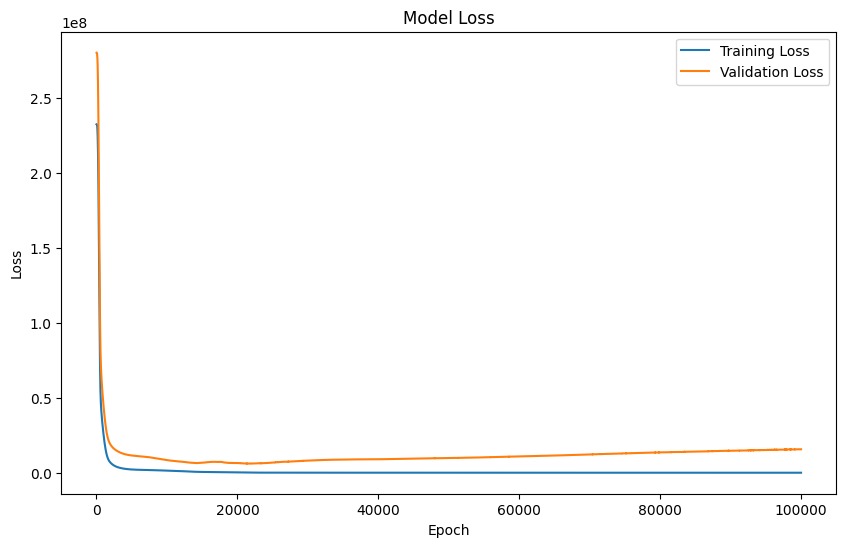

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim


# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, 1)  # Output layer for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Initialize the model and optimizer
model = MLP(X_train.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()  # Mean Squared Error loss for regression

# Training loop
num_epochs = 100000
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation loss
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



## with MSELoss and SGD

Epoch [1000/100000], Training Loss: 3811422.2500, Validation Loss: 14421526.0000
Epoch [2000/100000], Training Loss: 2132506.7500, Validation Loss: 11107501.0000
Epoch [3000/100000], Training Loss: 1759169.5000, Validation Loss: 9950388.0000
Epoch [4000/100000], Training Loss: 1378216.2500, Validation Loss: 8463630.0000
Epoch [5000/100000], Training Loss: 940857.1875, Validation Loss: 6991557.0000
Epoch [6000/100000], Training Loss: 674425.0000, Validation Loss: 6601513.0000
Epoch [7000/100000], Training Loss: 482218.4062, Validation Loss: 6652163.0000
Epoch [8000/100000], Training Loss: 347719.2500, Validation Loss: 6632085.0000
Epoch [9000/100000], Training Loss: 278826.6250, Validation Loss: 6874363.5000
Epoch [10000/100000], Training Loss: 241921.5000, Validation Loss: 7460926.5000
Epoch [11000/100000], Training Loss: 210022.2500, Validation Loss: 8121660.0000
Epoch [12000/100000], Training Loss: 185361.6250, Validation Loss: 9321949.0000
Epoch [13000/100000], Training Loss: 172071

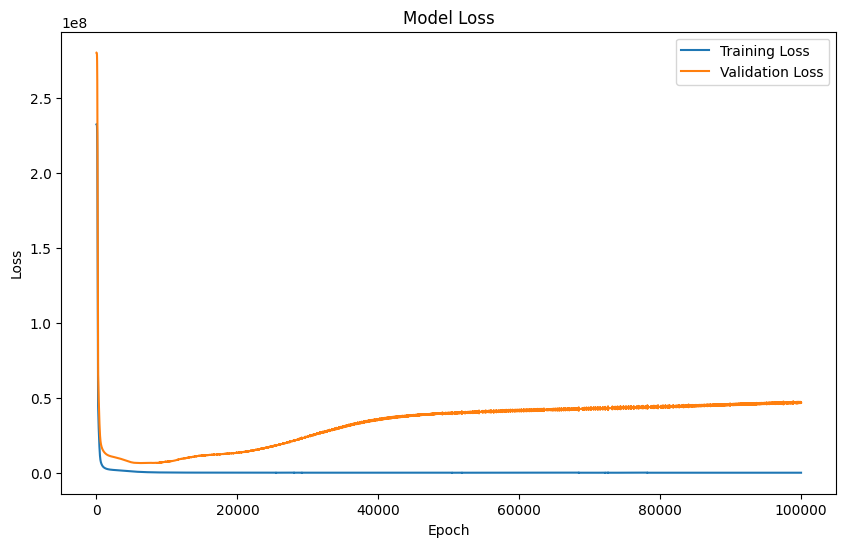

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim


# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, 1)  # Output layer for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Initialize the model and optimizer
model = MLP(X_train.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()  # Mean Squared Error loss for regression

# Training loop
num_epochs = 100000
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation loss
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch [1000/100000], Training Loss: 58864340.0000, Validation Loss: 89651552.0000
Epoch [2000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [3000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [4000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [5000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [6000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [7000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [8000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [9000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [10000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [11000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [12000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [13000/

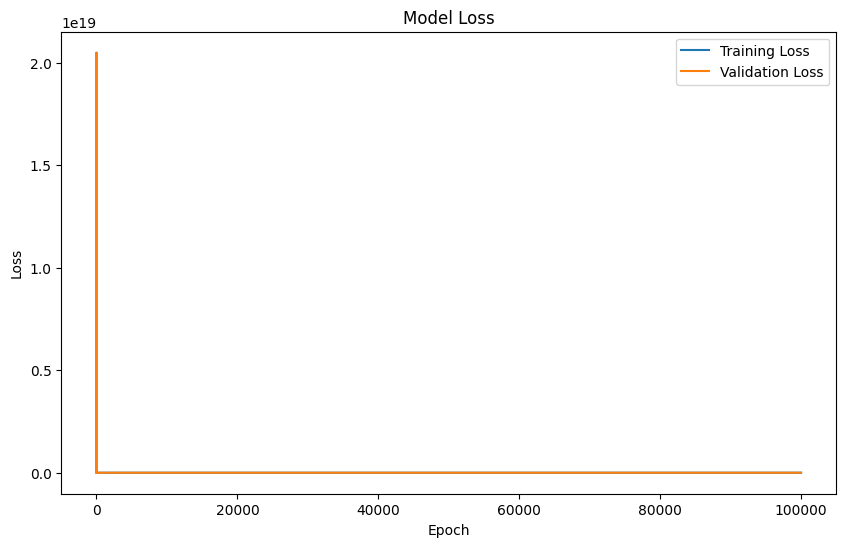

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim


# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, 1)  # Output layer for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Initialize the model and optimizer
model = MLP(X_train.shape[1])
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Use SGD optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss for regression

# Training loop
num_epochs = 100000
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation loss
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch [1000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [2000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [3000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [4000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [5000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [6000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [7000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [8000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [9000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [10000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [11000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [12000/100000], Training Loss: 58864340.0000, Validation Loss: 89651384.0000
Epoch [13000/

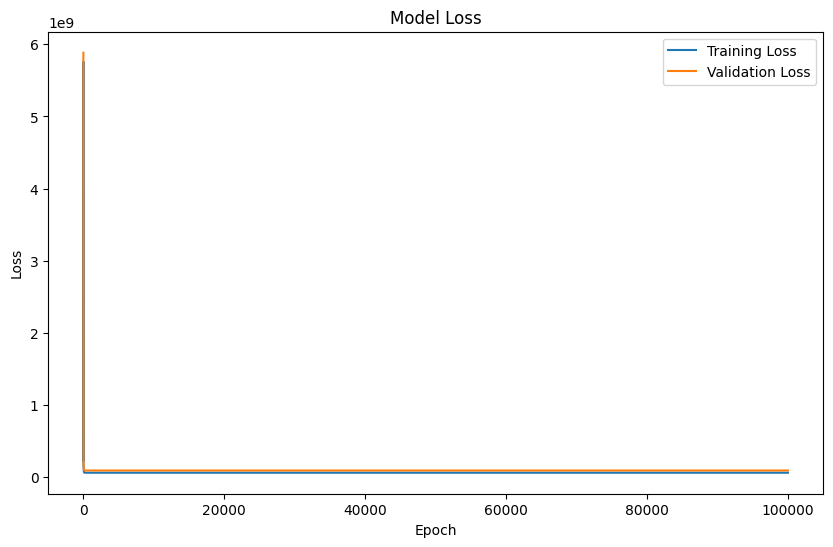

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim


# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, 1)  # Output layer for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Initialize the model and optimizer
model = MLP(X_train.shape[1])
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Use SGD optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss for regression

# Training loop
num_epochs = 100000
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation loss
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## with L1loss and Adam

Epoch [1000/100000], Training Loss: 955.4535, Validation Loss: 2305.6797
Epoch [2000/100000], Training Loss: 828.1581, Validation Loss: 2306.0752
Epoch [3000/100000], Training Loss: 792.0024, Validation Loss: 2240.9863
Epoch [4000/100000], Training Loss: 761.9495, Validation Loss: 2254.3010
Epoch [5000/100000], Training Loss: 744.9855, Validation Loss: 2216.9236
Epoch [6000/100000], Training Loss: 731.9711, Validation Loss: 2181.6482
Epoch [7000/100000], Training Loss: 712.7858, Validation Loss: 2137.2429
Epoch [8000/100000], Training Loss: 695.2878, Validation Loss: 2131.5652
Epoch [9000/100000], Training Loss: 684.4320, Validation Loss: 2110.1909
Epoch [10000/100000], Training Loss: 673.5444, Validation Loss: 2082.0229
Epoch [11000/100000], Training Loss: 666.2056, Validation Loss: 2038.7184
Epoch [12000/100000], Training Loss: 655.1089, Validation Loss: 2008.7146
Epoch [13000/100000], Training Loss: 647.5798, Validation Loss: 1986.8401
Epoch [14000/100000], Training Loss: 640.6730, 

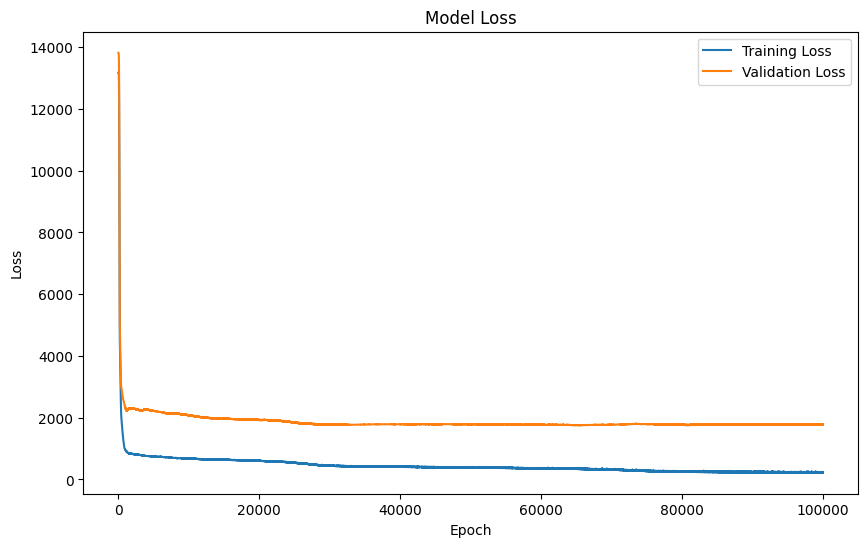

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim


# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, 1)  # Output layer for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Initialize the model and optimizer
model = MLP(X_train.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.L1Loss()  # Mean Absolute Error (MAE) loss for regression

# Training loop
num_epochs = 100000
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation loss
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch [1000/100000], Training Loss: 3129.0359, Validation Loss: 3785.5964
Epoch [2000/100000], Training Loss: 1567.6575, Validation Loss: 2749.4937
Epoch [3000/100000], Training Loss: 1025.7712, Validation Loss: 2426.0439
Epoch [4000/100000], Training Loss: 906.6719, Validation Loss: 2244.6199
Epoch [5000/100000], Training Loss: 857.1389, Validation Loss: 2318.3489
Epoch [6000/100000], Training Loss: 846.8624, Validation Loss: 2345.8755
Epoch [7000/100000], Training Loss: 844.7444, Validation Loss: 2340.2932
Epoch [8000/100000], Training Loss: 842.6633, Validation Loss: 2338.4998
Epoch [9000/100000], Training Loss: 840.7856, Validation Loss: 2335.8254
Epoch [10000/100000], Training Loss: 840.0782, Validation Loss: 2333.9895
Epoch [11000/100000], Training Loss: 837.7976, Validation Loss: 2333.7703
Epoch [12000/100000], Training Loss: 837.5033, Validation Loss: 2330.9087
Epoch [13000/100000], Training Loss: 836.6336, Validation Loss: 2327.4578
Epoch [14000/100000], Training Loss: 835.545

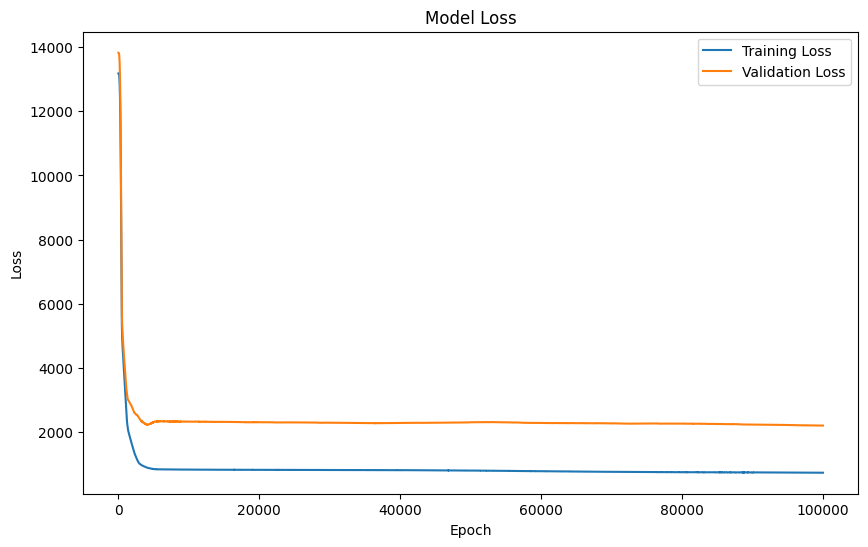

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim


# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, 1)  # Output layer for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Initialize the model and optimizer
model = MLP(X_train.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.L1Loss()  # Mean Absolute Error (MAE) loss for regression

# Training loop
num_epochs = 100000
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation loss
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch [1000/100000], Training Loss: 12367.4385, Validation Loss: 13002.2314
Epoch [2000/100000], Training Loss: 10208.7051, Validation Loss: 10821.0332
Epoch [3000/100000], Training Loss: 7083.8306, Validation Loss: 7633.0977
Epoch [4000/100000], Training Loss: 5146.2632, Validation Loss: 5551.5947
Epoch [5000/100000], Training Loss: 4501.5444, Validation Loss: 4934.0762
Epoch [6000/100000], Training Loss: 3977.9832, Validation Loss: 4413.6182
Epoch [7000/100000], Training Loss: 3403.8562, Validation Loss: 3891.1179
Epoch [8000/100000], Training Loss: 2782.5750, Validation Loss: 3426.5083
Epoch [9000/100000], Training Loss: 2295.1787, Validation Loss: 3135.0217
Epoch [10000/100000], Training Loss: 2043.3434, Validation Loss: 3019.8645
Epoch [11000/100000], Training Loss: 1891.2471, Validation Loss: 2963.3513
Epoch [12000/100000], Training Loss: 1730.4957, Validation Loss: 2884.2588
Epoch [13000/100000], Training Loss: 1563.7069, Validation Loss: 2787.3113
Epoch [14000/100000], Training

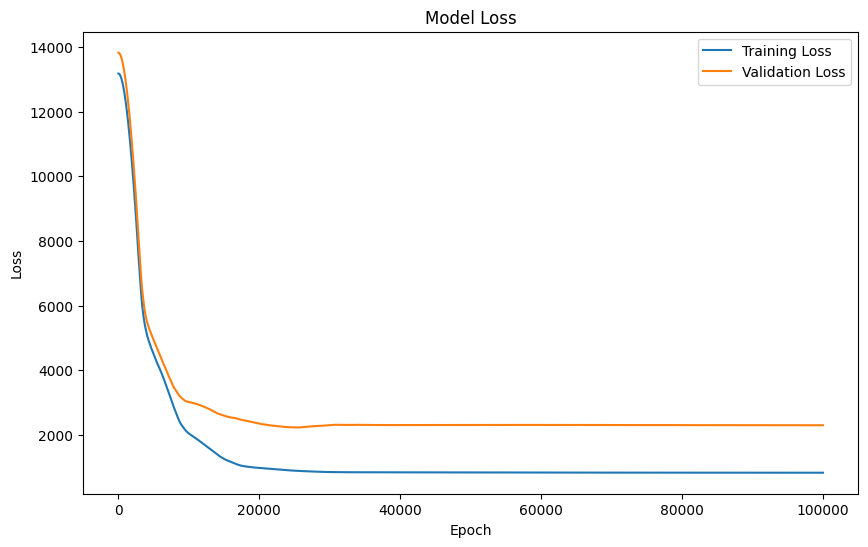

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim


# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, 1)  # Output layer for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Initialize the model and optimizer
model = MLP(X_train.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.L1Loss()  # Mean Absolute Error (MAE) loss for regression
# Training loop
num_epochs = 100000
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation loss
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## with SGD and L1loss

Epoch [1000/100000], Training Loss: 13169.3047, Validation Loss: 13813.7910
Epoch [2000/100000], Training Loss: 13159.3047, Validation Loss: 13803.7910
Epoch [3000/100000], Training Loss: 13149.3047, Validation Loss: 13793.7900
Epoch [4000/100000], Training Loss: 13139.3047, Validation Loss: 13783.7920
Epoch [5000/100000], Training Loss: 13129.3086, Validation Loss: 13773.7920
Epoch [6000/100000], Training Loss: 13119.3086, Validation Loss: 13763.7959
Epoch [7000/100000], Training Loss: 13109.3086, Validation Loss: 13753.7949
Epoch [8000/100000], Training Loss: 13099.3076, Validation Loss: 13743.7920
Epoch [9000/100000], Training Loss: 13089.3047, Validation Loss: 13733.7900
Epoch [10000/100000], Training Loss: 13079.3018, Validation Loss: 13723.7881
Epoch [11000/100000], Training Loss: 13069.2988, Validation Loss: 13713.7871
Epoch [12000/100000], Training Loss: 13059.2979, Validation Loss: 13703.7861
Epoch [13000/100000], Training Loss: 13049.2979, Validation Loss: 13693.7861
Epoch [1

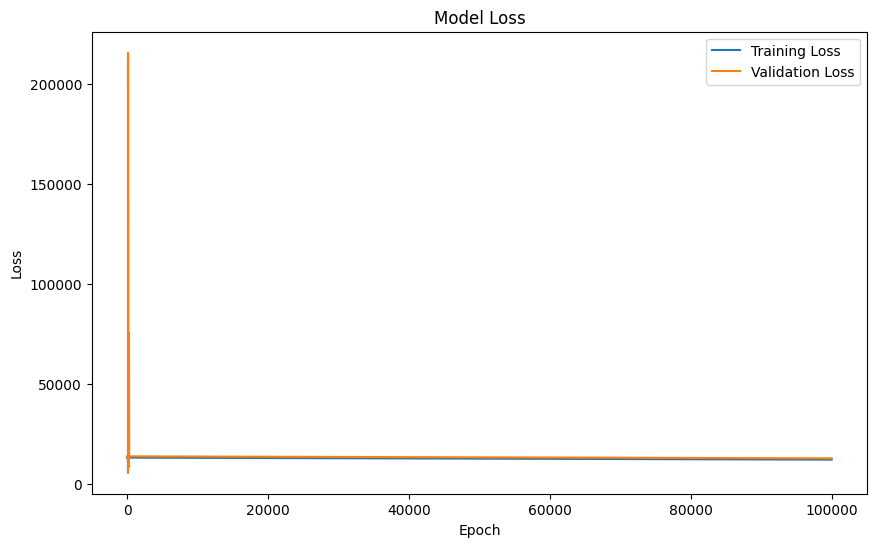

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim


# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, 1)  # Output layer for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Initialize the model and optimizer
model = MLP(X_train.shape[1])
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Use SGD optimizer
criterion = nn.L1Loss()  # Mean Absolute Error (MAE) loss for regression

# Training loop
num_epochs = 100000
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation loss
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch [1000/100000], Training Loss: 1295.8971, Validation Loss: 2064.5005
Epoch [2000/100000], Training Loss: 725.9029, Validation Loss: 2363.5371
Epoch [3000/100000], Training Loss: 774.4266, Validation Loss: 2946.4104
Epoch [4000/100000], Training Loss: 2475.1724, Validation Loss: 2531.3682
Epoch [5000/100000], Training Loss: 1159.9041, Validation Loss: 3556.7161
Epoch [6000/100000], Training Loss: 2289.2764, Validation Loss: 3267.6340
Epoch [7000/100000], Training Loss: 2112.7332, Validation Loss: 1807.3148
Epoch [8000/100000], Training Loss: 827.9953, Validation Loss: 2963.6997
Epoch [9000/100000], Training Loss: 589.9384, Validation Loss: 2281.9858
Epoch [10000/100000], Training Loss: 1924.0250, Validation Loss: 1786.1184
Epoch [11000/100000], Training Loss: 1411.6305, Validation Loss: 1884.9823
Epoch [12000/100000], Training Loss: 939.5265, Validation Loss: 2082.4629
Epoch [13000/100000], Training Loss: 1536.6566, Validation Loss: 1956.2510
Epoch [14000/100000], Training Loss: 72

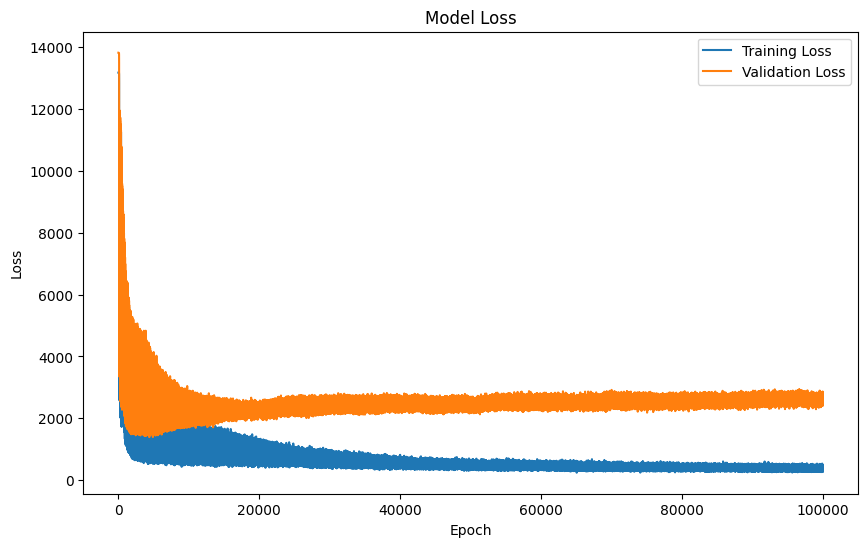

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim


# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, 1)  # Output layer for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Initialize the model and optimizer
model = MLP(X_train.shape[1])
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Use SGD optimizer
criterion = nn.L1Loss()  # Mean Absolute Error (MAE) loss for regression

# Training loop
num_epochs = 100000
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation loss
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch [1000/100000], Training Loss: 1624.2583, Validation Loss: 2570.0293
Epoch [2000/100000], Training Loss: 1005.4628, Validation Loss: 2269.3301
Epoch [3000/100000], Training Loss: 906.3544, Validation Loss: 2186.7654
Epoch [4000/100000], Training Loss: 888.9537, Validation Loss: 2196.1624
Epoch [5000/100000], Training Loss: 886.0892, Validation Loss: 2223.2317
Epoch [6000/100000], Training Loss: 954.2162, Validation Loss: 2220.9590
Epoch [7000/100000], Training Loss: 929.9377, Validation Loss: 2280.2393
Epoch [8000/100000], Training Loss: 882.1016, Validation Loss: 2213.2468
Epoch [9000/100000], Training Loss: 854.0497, Validation Loss: 2205.5996
Epoch [10000/100000], Training Loss: 855.1182, Validation Loss: 2213.1587
Epoch [11000/100000], Training Loss: 832.2394, Validation Loss: 2231.5762
Epoch [12000/100000], Training Loss: 811.9131, Validation Loss: 2214.7861
Epoch [13000/100000], Training Loss: 787.5844, Validation Loss: 2224.9810
Epoch [14000/100000], Training Loss: 844.3307

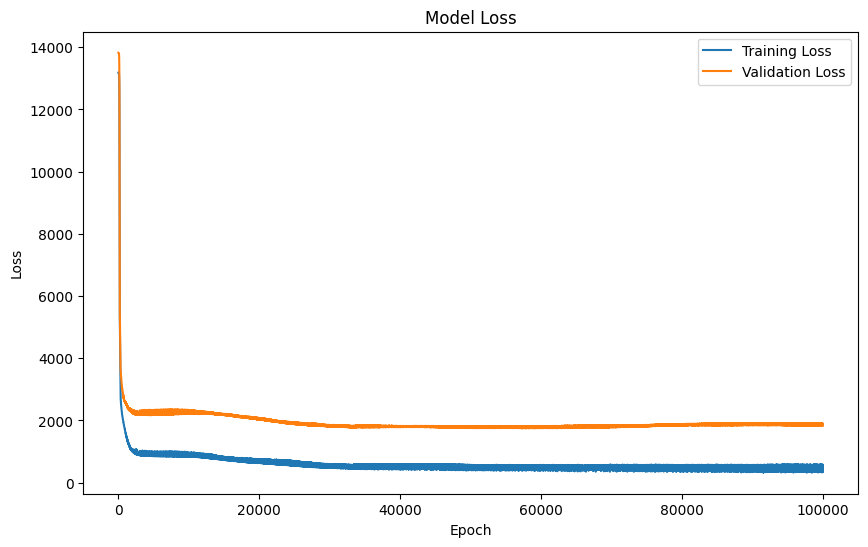

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim


# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(32, 1)  # Output layer for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Initialize the model and optimizer
model = MLP(X_train.shape[1])
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Use SGD optimizer
criterion = nn.L1Loss()  # Mean Absolute Error (MAE) loss for regression

# Training loop
num_epochs = 100000
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation loss
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()